In [1]:
#loc: frequency graphs of days of week, on Route Auxiliary, light condition, weather condition, road condition, road surface condition
#first harmful event location, base intersection route category, Base Intersection Route Auxiliary,
#juction type, work zone type, traffic control type, 
#county of collision,first harmful event, primary contributing factor, on route category

#occ: person seating location, restraint/safety device, air bag deployment

#tbd: hazardous materials class, vehicle configuration, truck length code 1

#unt: unit type, vehicle use, action prior to impact, extent of deformity, most harmful event, manner of collision,
#underride/override, drug test results, first and most deformed areas, 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
loc = pd.read_csv("./data/sc_loc2018.csv", low_memory = False)
loc.rename(columns = {'ano':'Collision Number', 'tway':'Trafficway','typ':'Type of Record (L-Location data)', 'day':'Day of Week',
                 'rai':'On Route Auxiliary','loa':'Lane Number of Collision','odr':'Base Distance Direction', 'alc':'Light Condition', 'wcc':'Weather Condition',
                 'ahc':'Road Condition', 'rsc':'Road Surface Condition', 'hel':'First Harmful Event Location',
                 'xwk':'Crosswalk Indicator', 'dat':'Date of Collision', 'als':'On Route Street Name','jur':'Investigating Jurisdiction Code', 
                 'fat':'Number of Fatalities', 'inj':'Number of Non-Fatal Injuries','acd':'Amended or Corrected Indicator', 'bir':'Base Intersection Route Category', 
                 'bra':'Base Intersection Route Auxiliary', 'sic':'Second Intersection Route Category', 'sra':'Second Intersection Route Auxiliary', 'alsb':'Base Intersection Street Name',
                 'bus':'Number of Buses', 'trm':'Number of Persons Transported Immediately', 'tow':'Number of Towed Units',
                 'lat':'Latitude of Collision (special format)', 'lon':'Longitude of Collision (special format)', 'jct':'Junction Type','ocf1':'Other Contributing Factor 1','ocf2':'Other Contributing Factor 2','ocf3':'Other Contributing Factor 3',
                 'ocf4':'Other Contributing Factor 4', 'ibus':'School Bus Involved', 'wzn':'Work Zone Indicator','wzt':'Work Zone Type',
                 'wzl':'Work Zone Location','wpr':'Workers Present Indicator','bno':'Currently Junk field, was Badge Number of Investigating Officer',
                 'tct':'Traffic Control Type','unt':'Number of Units (Vehicle and Non-Motorists)','cty':'County of Collision',
                 'fhe':'First Harmful Event','prc':'Primary Contributing Factor','rct':'On Route Category','adid':'Alcohol/Drug Involved Driver in Collision',
                 'dlr':'Direction of Lane', 'rtn':'On Route Street Number','brn':'Base Intersetion Street Number','srn':'Second Intersection Street Number', 'tim':'Military Time of Collision',
                 'bdo':'Base Distance Offset (from collision location to the base intersection in miles)','pnt':'Military Time of Police Notification', 'pat':'Military Time of Police Arrival at Scene',
                 'alss':'Second Intersection Street Name','hzd':'Currently Junk field'}, inplace = True)
occ = pd.read_csv("./data/sc_occ2018.csv", low_memory=False)
tbd = pd.read_csv("./data/sc_tbd2018.csv")
unt = pd.read_csv("./data/sc_unt2018.csv", low_memory=False)
occ.rename(columns = {'ano':'Collision Number','aun':'Unit Number','osl':'Person Seating Location','typ':'Record Type',
                     'sta':'Currently Junk Variable', 'osex':'Person Gender', 'orac':'Person Race','age':'Person Age','reu':'Restraint/Safety Device',
                     'lai':'Location After Impact','sev':'Injury Status', 'mhi':'Motorcycle Head Injury', 'eje':'Ejection Status',
                     'tmed':'Transported to Medical Facility?','tbw':'Transport by whom', 'air':'Air Bag Deployment','occzip':'Person Zip Code'}, inplace=True)
tbd.rename(columns = {'ano':'Collision Number','aun':'Unit Number','cnam':'Carrier Name', 'csa':'Carrier Street', 'ccit':'Carrier City', 'csta':'Carrier State',
                     'czip':'Carrier Zip','cdot':'Carrier DOT Number','acon':'Access Control','hazm':'Carrying Hazardous Materials?','hazp':'Hazardous Materials Placard?',
                     'hazc':'Hazardous Materials Class', 'hazd':'Hazardous Materials ID', 'hazr':'Hazardous Materials Released?', 'gvwc':'Gross Veh Weight Rating/Combo Rating',
                     'vcc':'Vehicle Configuration','trl1':'Trailer Length1 Code', 'trl2':'Trailer Length2 Code', 'trw1':'Trailer Width1 Code','trw2':'Trailer Width2 Code','tbc':'Citation Issued',
                     'iic':'Carrier Type'}, inplace = True)
unt.rename(columns = {'adi':'Alcohol/Drug Information','ano':'Collision Number','api':'Action Prior to Impact','atg':'Alcohol Test Given', 'atr2':'Alcohol Test Results','att':'Alcohol Test Type',
                     'aun':'Unit Number','bdt':'Vehicle Body Type','cdl':'CDL licensed required','cn2':'Citation Violation Code 2','csn':'Citation Violation Code 1','cta':'Contributed to Collision',
                     'dtc':'Drivers License Class','dls':'Drivers License State','dot':'Direction of Travel','drac':'Driver Race','dsex':'Driver Sex','dtg':'Drug Test Given','dtr':'Drug Test Results',
                     'dtt':'Drug Test Type','ead':'Unit Damage(in dollars)','ecs':'Estimated Collision Speed','edam':'Extent of Deformity','edp':'Property Damage','fda':'First Deformed Area','man':'Manner of Collision',
                     'mda':'Most Deformed Area','mhe':'Most Harmful Event','noc':'Number of Occupants','pd2':'Property Damage 2','rps':'Vehicle Registration Plate State','soe1':'Sequence of Events1','soe2':'Sequence of Events2',
                     'soe3':'Sequence of Events3','soe4':'Sequence of Events4','spl':'Speed Limit','tbr':'Truck/Bus Supplemental Form Required','towd':'Towed','uor':'Underride / Override','utc':'Unit Type','vat':'Vehicle Attachments',
                     'vin':'Vehicle Identification Number','vmk':'Vehicle Make','vry':'Vehicle Registration Plate Year','vuc':'Vehicle Use', 'dlc':'Drivers License Class'}, inplace = True)
loc.head()

,Collision Number,Trafficway,Type of Record (L-Location data),Day of Week,On Route Auxiliary,Lane Number of Collision,Base Distance Direction,Light Condition,Weather Condition,Road Condition,...,Second Intersection Street Number,First Harmful Event,Primary Contributing Factor,Military Time of Collision,Base Distance Offset (from collision location to the base intersection in miles),Military Time of Police Notification,Military Time of Police Arrival at Scene,On Route Category,Alcohol/Drug Involved Driver in Collision,Direction of Lane
0,18000001,1,L,6,0.0,1.0,S,1,1,1,...,6.0,22,2,948,0001,948,952,2,NO,S
1,18000002,2,L,2,0.0,2.0,N,5,1,1,...,0.0,22,8,145,0000,150,155,4,NO,N
2,18000003,3,L,2,0.0,3.0,S,5,1,2,...,0.0,19,16,150,0050,151,156,3,YES,N
3,18000004,4,L,2,0.0,2.0,E,5,1,1,...,106.0,22,16,218,0000,218,218,5,YES,E
4,18000005,1,L,2,0.0,2.0,S,2,3,1,...,118.0,25,7,715,0002,716,725,5,NO,N


<Axes: title={'center': 'Direction of Lane'}, xlabel='Direction of Lane'>

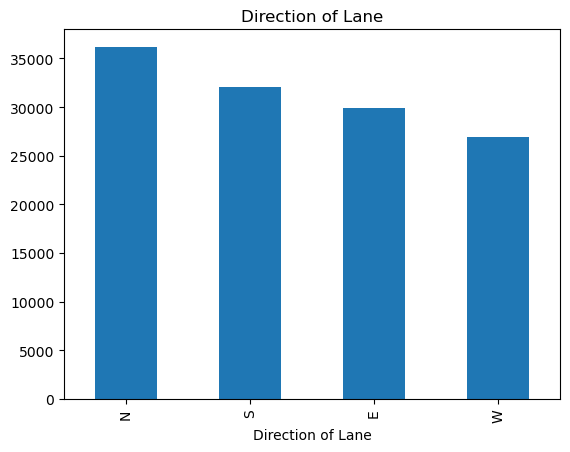

In [36]:
fig, ax = plt.subplots()
loc['Direction of Lane'].value_counts().plot(ax=ax, kind='bar', title='Direction of Lane')

<Axes: title={'center': 'Direction of Lane'}, xlabel='Direction of Lane'>

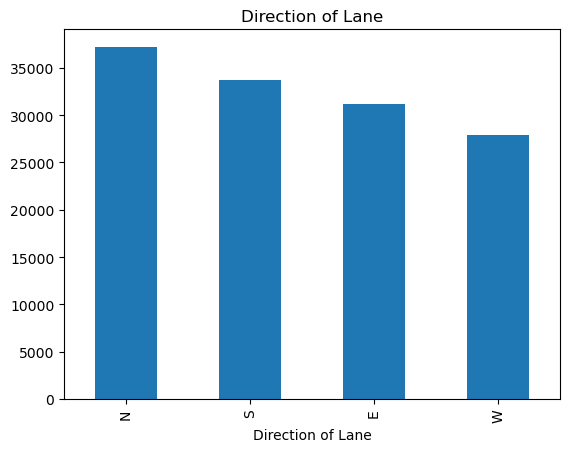

In [20]:
fig, ax = plt.subplots()
loc['Direction of Lane'].value_counts().plot(ax=ax, kind='bar', title='Direction of Lane')

<Axes: title={'center': 'Day of Week'}, xlabel='Day of Week'>

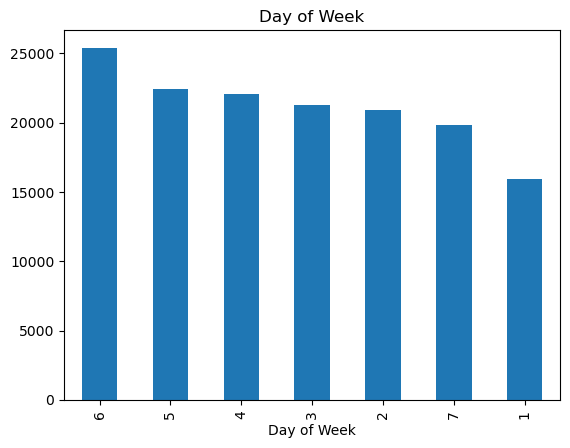

In [64]:
fig, ax = plt.subplots()
loc['Day of Week'].value_counts().plot(ax=ax, kind='bar', title='Day of Week')

<Axes: title={'center': 'On Route Auxiliary'}, xlabel='On Route Auxiliary'>

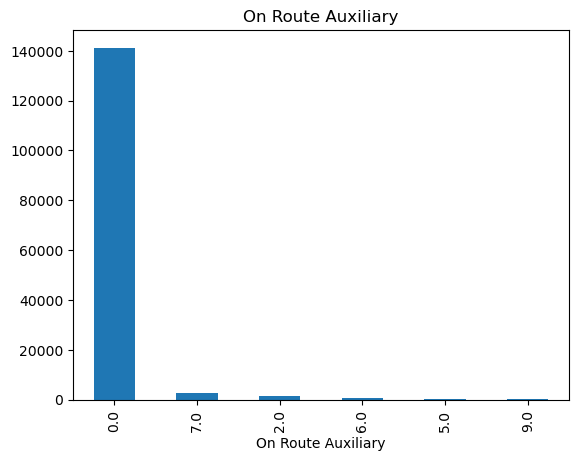

In [65]:
fig, ax = plt.subplots()
loc['On Route Auxiliary'].value_counts().plot(ax=ax, kind='bar', title='On Route Auxiliary')

<Axes: title={'center': 'Light Condition'}, xlabel='Light Condition'>

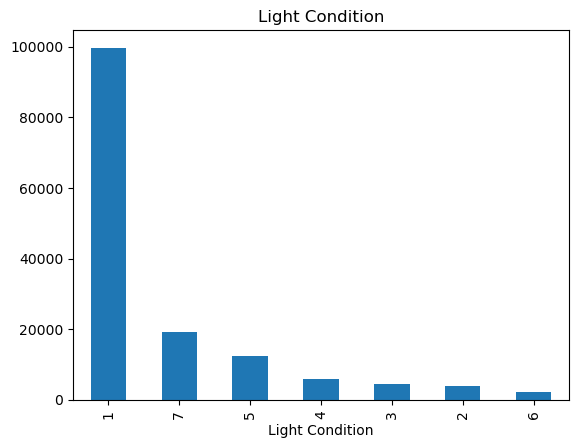

In [66]:
fig, ax = plt.subplots()
loc['Light Condition'].value_counts().plot(ax=ax, kind='bar', title='Light Condition')

<Axes: title={'center': 'Weather Condition'}, xlabel='Weather Condition'>

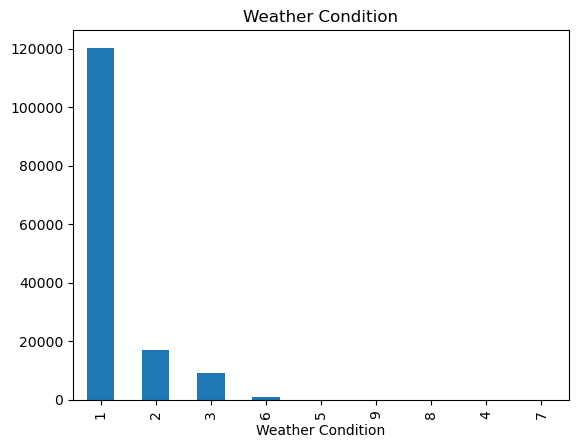

In [67]:
fig, ax = plt.subplots()
loc['Weather Condition'].value_counts().plot(ax=ax, kind='bar', title='Weather Condition')


<Axes: title={'center': 'Road Condition'}, xlabel='Road Condition'>

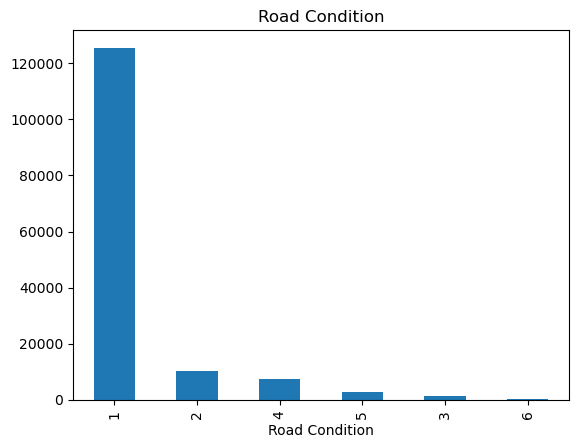

In [68]:
fig, ax = plt.subplots()
loc['Road Condition'].value_counts().plot(ax=ax, kind='bar', title='Road Condition')


<Axes: title={'center': 'Road Surface Condition'}, xlabel='Road Surface Condition'>

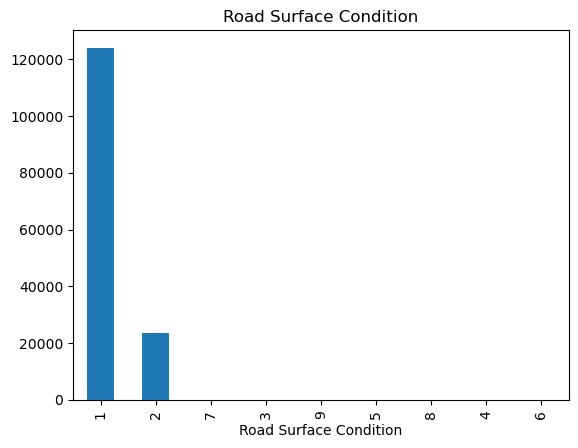

In [69]:
fig, ax = plt.subplots()
loc['Road Surface Condition'].value_counts().plot(ax=ax, kind='bar', title='Road Surface Condition')


<Axes: title={'center': 'First Harmful Event Location'}, xlabel='First Harmful Event Location'>

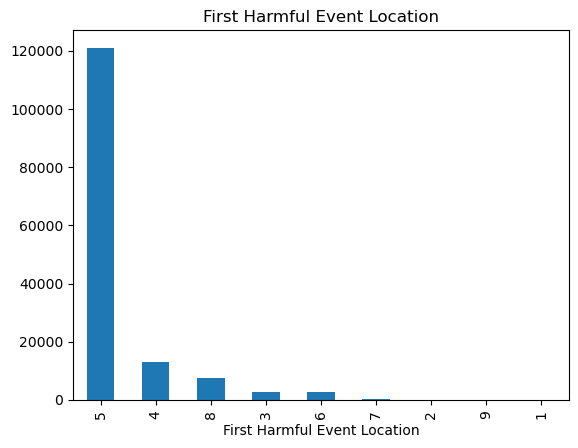

In [70]:
fig, ax = plt.subplots()
loc['First Harmful Event Location'].value_counts().plot(ax=ax, kind='bar', title='First Harmful Event Location')


<Axes: title={'center': 'Base Intersection Route Category'}, xlabel='Base Intersection Route Category'>

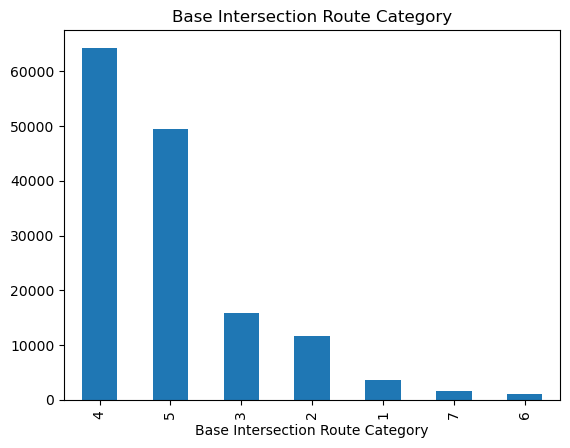

In [71]:
fig, ax = plt.subplots()
loc['Base Intersection Route Category'].value_counts().plot(ax=ax, kind='bar', title='Base Intersection Route Category')


<Axes: title={'center': 'Base Intersection Route Auxiliary'}, xlabel='Base Intersection Route Auxiliary'>

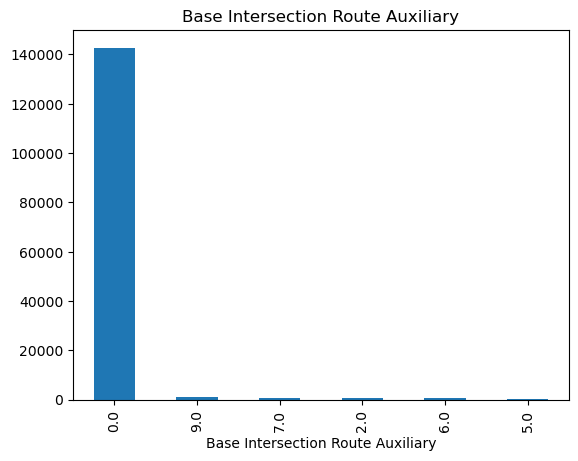

In [72]:
fig, ax = plt.subplots()
loc['Base Intersection Route Auxiliary'].value_counts().plot(ax=ax, kind='bar', title='Base Intersection Route Auxiliary')


<Axes: title={'center': 'Junction Type'}, xlabel='Junction Type'>

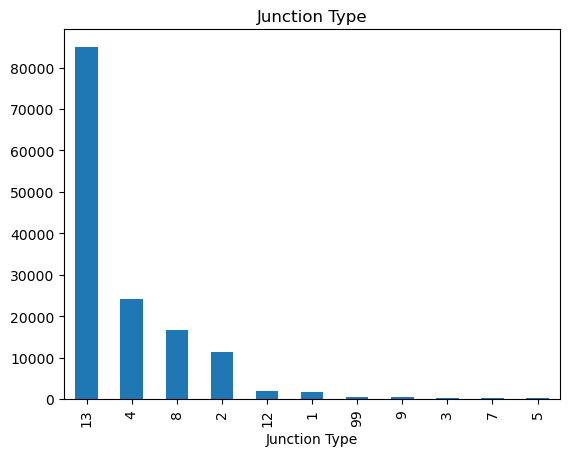

In [31]:
fig, ax = plt.subplots()
loc['Junction Type'].value_counts().plot(ax=ax, kind='bar', title='Junction Type')


<Axes: title={'center': 'Work Zone Type'}, xlabel='Work Zone Type'>

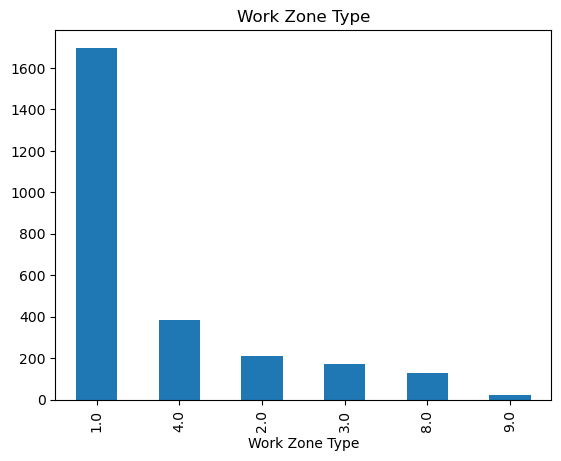

In [74]:
fig, ax = plt.subplots()
loc['Work Zone Type'].value_counts().plot(ax=ax, kind='bar', title='Work Zone Type')


<Axes: title={'center': 'Traffic Control Type'}, xlabel='Traffic Control Type'>

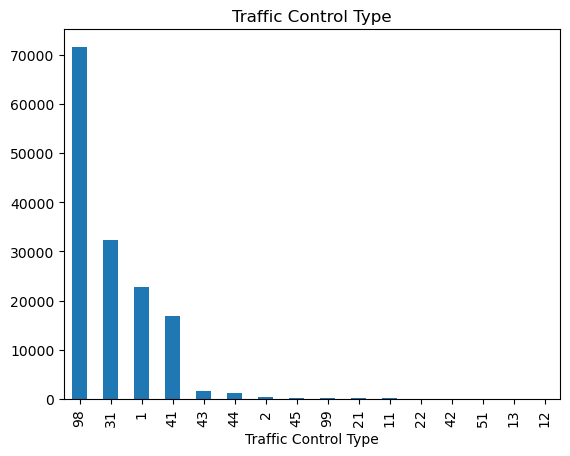

In [75]:
fig, ax = plt.subplots()
loc['Traffic Control Type'].value_counts().plot(ax=ax, kind='bar', title='Traffic Control Type')


<Axes: title={'center': 'County of Collision'}, xlabel='County of Collision'>

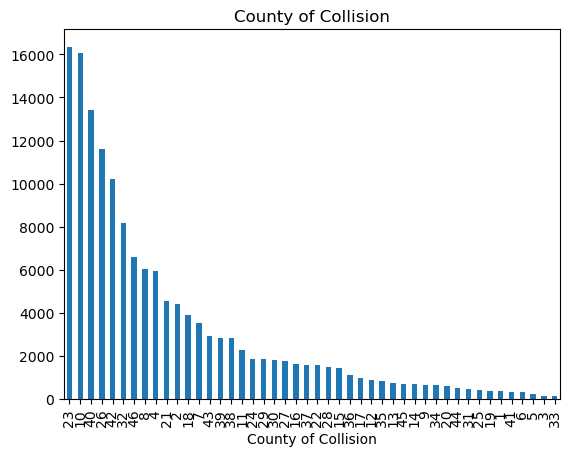

In [76]:
fig, ax = plt.subplots()
loc['County of Collision'].value_counts().plot(ax=ax, kind='bar', title='County of Collision')


<Axes: title={'center': 'First Harmful Event'}, xlabel='First Harmful Event'>

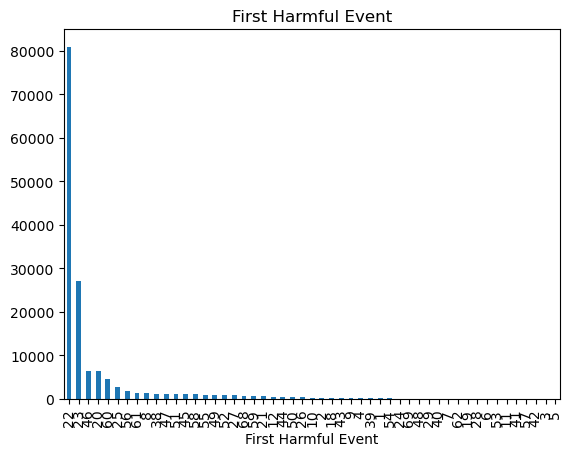

In [77]:
fig, ax = plt.subplots()
loc['First Harmful Event'].value_counts().plot(ax=ax, kind='bar', title='First Harmful Event')


<Axes: title={'center': 'Primary Contributing Factor'}, xlabel='Primary Contributing Factor'>

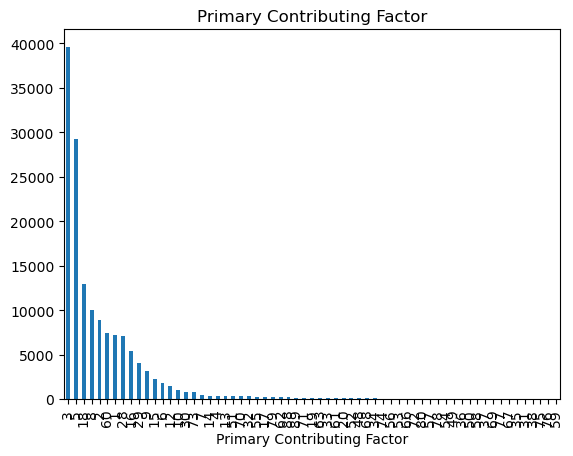

In [78]:
fig, ax = plt.subplots()
loc['Primary Contributing Factor'].value_counts().plot(ax=ax, kind='bar', title='Primary Contributing Factor')


<Axes: title={'center': 'On Route Category'}, xlabel='On Route Category'>

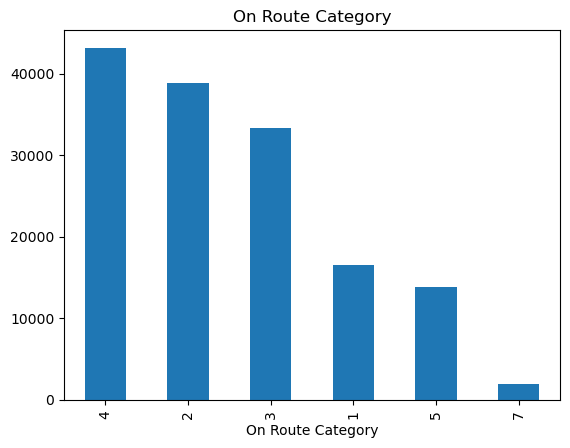

In [79]:
fig, ax = plt.subplots()
loc['On Route Category'].value_counts().plot(ax=ax, kind='bar', title='On Route Category')

KeyError: 'Citation Issued'

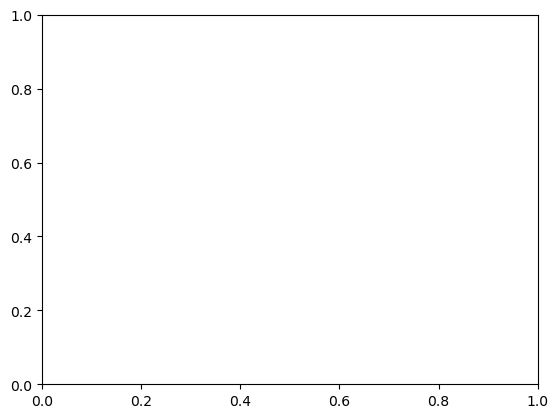

In [48]:
fig, ax = plt.subplots()
occ['Citation Issued'].value_counts().plot(ax=ax, kind='bar', title='Citation Issued')

<Axes: title={'center': 'Restraint/Safety Device'}, xlabel='Restraint/Safety Device'>

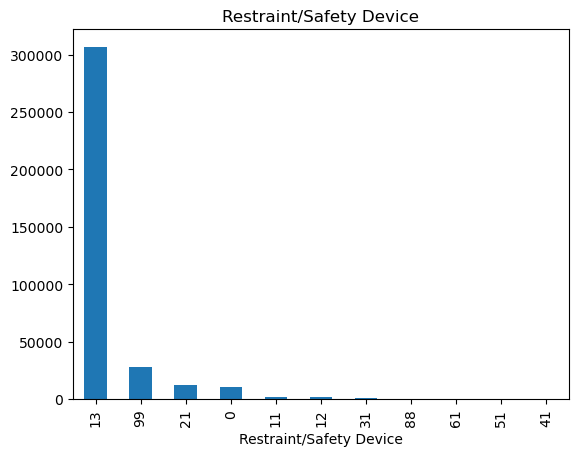

In [81]:
fig, ax = plt.subplots()
occ['Restraint/Safety Device'].value_counts().plot(ax=ax, kind='bar', title='Restraint/Safety Device')

<Axes: title={'center': 'Air Bag Deployment'}, xlabel='Air Bag Deployment'>

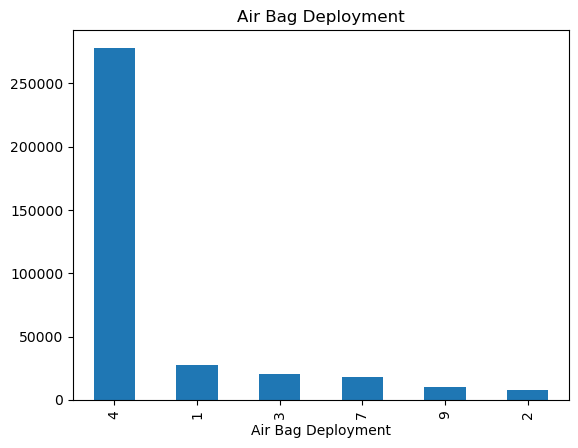

In [82]:
fig, ax = plt.subplots()
occ['Air Bag Deployment'].value_counts().plot(ax=ax, kind='bar', title='Air Bag Deployment')

<Axes: title={'center': 'Carrier Type'}, xlabel='Carrier Type'>

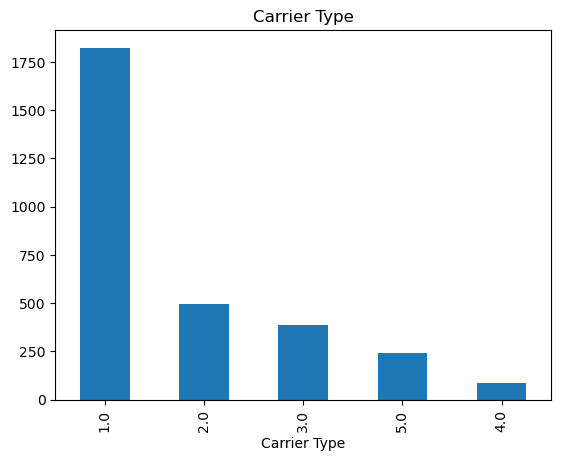

In [34]:
fig, ax = plt.subplots()
tbd['Carrier Type'].value_counts().plot(ax=ax, kind='bar', title='Carrier Type')

<Axes: title={'center': 'Carrier Type'}, xlabel='Carrier Type'>

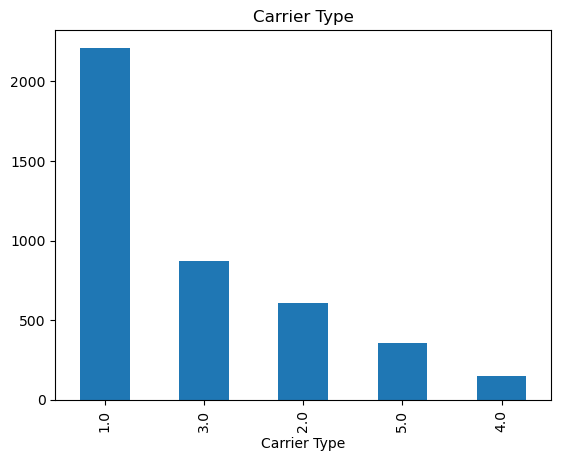

In [50]:
fig, ax = plt.subplots()
tbd['Carrier Type'].value_counts().plot(ax=ax, kind='bar', title='Carrier Type')

<Axes: title={'center': 'Speed Limit'}, xlabel='Vehicle Attachments'>

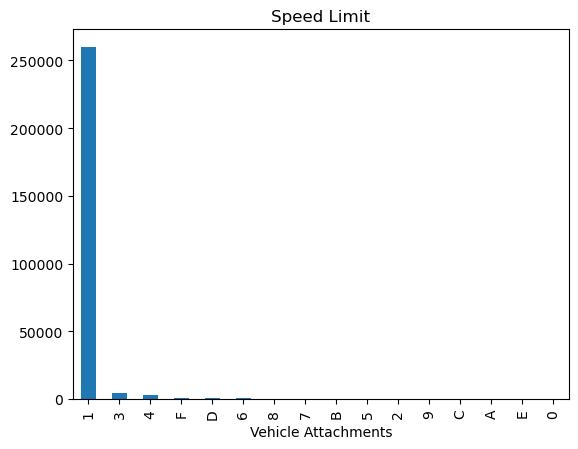

In [8]:
fig, ax = plt.subplots()
unt['Vehicle Attachments'].value_counts().plot(ax=ax, kind='bar', title='Speed Limit')

<Axes: title={'center': 'Vehicle Use'}, xlabel='Vehicle Use'>

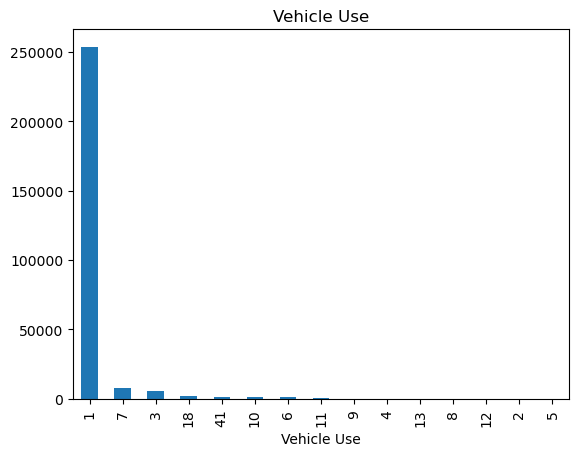

In [86]:
fig, ax = plt.subplots()
unt['Vehicle Use'].value_counts().plot(ax=ax, kind='bar', title='Vehicle Use')

<Axes: title={'center': 'Action Prior to Impact'}, xlabel='Action Prior to Impact'>

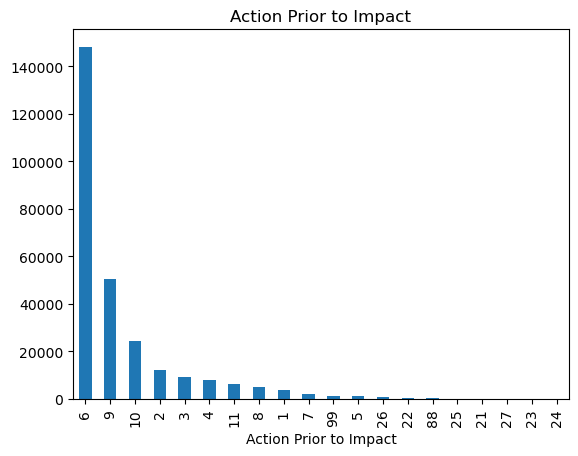

In [87]:
fig, ax = plt.subplots()
unt['Action Prior to Impact'].value_counts().plot(ax=ax, kind='bar', title='Action Prior to Impact')

<Axes: title={'center': 'Extent of Deformity'}, xlabel='Extent of Deformity'>

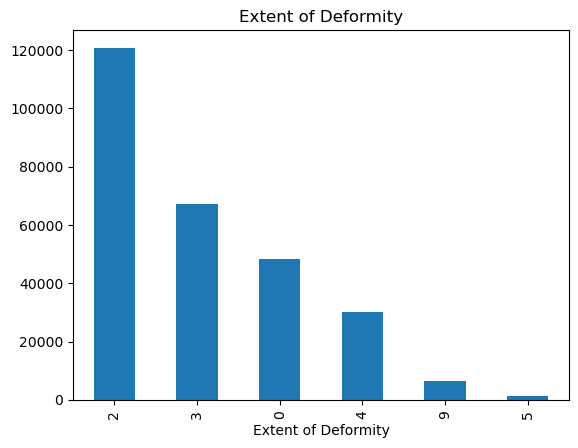

In [88]:
fig, ax = plt.subplots()
unt['Extent of Deformity'].value_counts().plot(ax=ax, kind='bar', title='Extent of Deformity')

<Axes: title={'center': 'Most Harmful Event'}, xlabel='Most Harmful Event'>

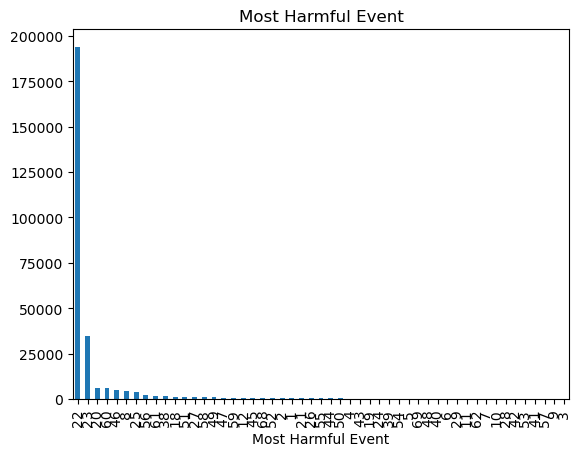

In [89]:
fig, ax = plt.subplots()
unt['Most Harmful Event'].value_counts().plot(ax=ax, kind='bar', title='Most Harmful Event')

<Axes: title={'center': 'Manner of Collision'}, xlabel='Manner of Collision'>

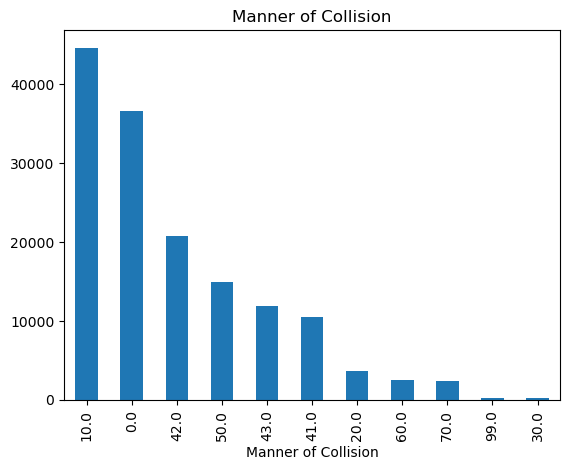

In [90]:
fig, ax = plt.subplots()
unt['Manner of Collision'].value_counts().plot(ax=ax, kind='bar', title='Manner of Collision')

<Axes: title={'center': 'Underride/Override'}, xlabel='Underride / Override'>

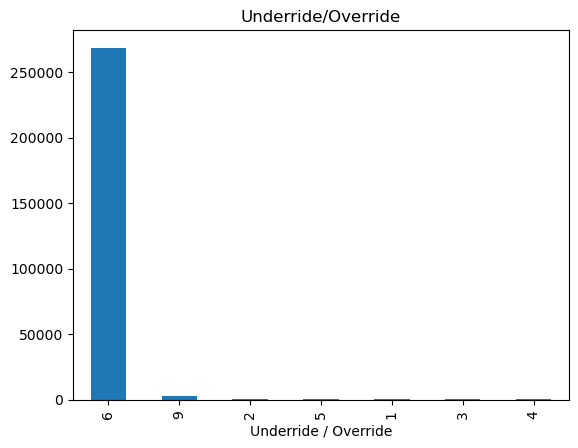

In [91]:
fig, ax = plt.subplots()
unt['Underride / Override'].value_counts().plot(ax=ax, kind='bar', title='Underride/Override')

KeyboardInterrupt: 

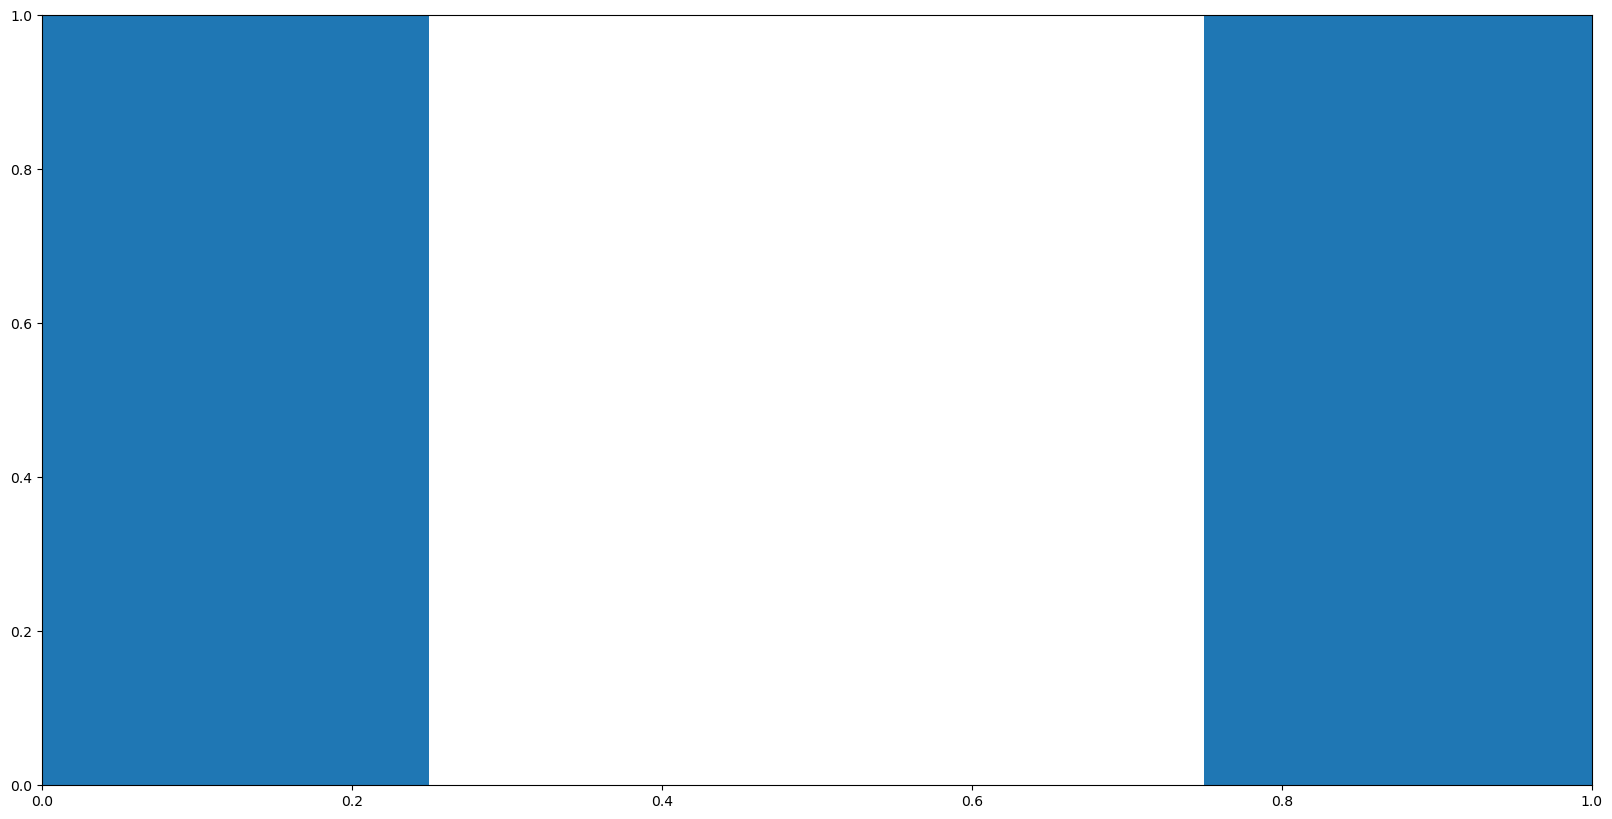

In [20]:
fig, ax = plt.subplots()
unt['Unit Damage(in dollars)'].plot(ax=ax, kind='bar', title='Unit Damage', figsize=(20,10), rot=45)

<Axes: title={'center': 'Number of occupants'}, xlabel='Number of Occupants'>

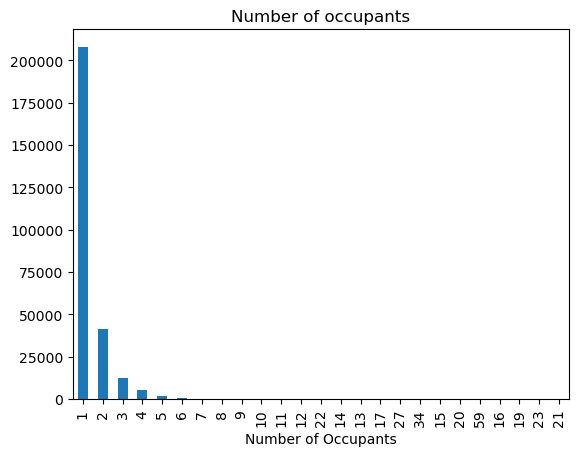

In [21]:
fig, ax = plt.subplots()

unt['Number of Occupants'].value_counts().plot(ax=ax, kind='bar', title='Number of occupants')

<Axes: title={'center': 'CDL licensed required'}, xlabel='CDL licensed required'>

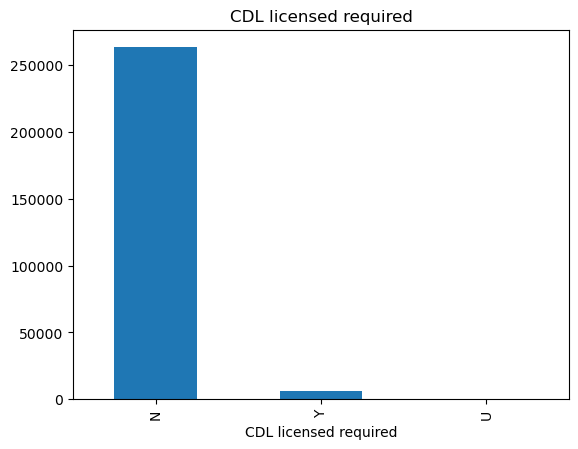

In [22]:
fig, ax = plt.subplots()

unt['CDL licensed required'].value_counts().plot(ax=ax, kind='bar', title='CDL licensed required')